# Multivariate Gaussians

## General Idea

The multivariate Normal distribution is the generalization of the Normal distribution into multiple dimensions. The probability density function takes the form:

$$f \left (\vec x \right ) = \frac{1}{\sqrt{(2 \pi)^k |\Sigma|}}\exp \left \{ -\frac{1}{2} (\vec x - \vec \mu)^T \Sigma^{-1}(\vec x - \vec \mu) \right \} $$

A few notes about notation. $\vec x$ and $\vec \mu$ are both $k$ dimensional vectors, and $\Sigma$ is a $k \times k$ covariance matrix. To get some intuition about this distribution, let's think about the standard normal in two dimensions. So our parameters are:

$$k = 2 \quad \vec \mu = \begin{bmatrix} 0 \\ 0 \end{bmatrix} \quad \Sigma = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \quad \Rightarrow \quad |\Sigma| = \begin{vmatrix} 1 & 0 \\ 0 & 1 \end{vmatrix} = (1 \times 1 + 0 \times 0) = 1$$

$$\Sigma^{-1} = \frac{1}{|\Sigma|} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \frac{1}{1} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

Plugging these in gives us the density:

$$\begin{align*}
f \left (\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \right ) &= \frac{1}{\sqrt{(2 \pi)^2 \times 1}}\exp \left \{ -\frac{1}{2}  \left (\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}  - \begin{bmatrix} 0 \\ 0 \end{bmatrix} \right )^T \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\left (\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}  - \begin{bmatrix} 0 \\ 0 \end{bmatrix} \right )\right \} \\
 &= \frac{1}{\sqrt{(2 \pi)^2}}\exp \left \{ -\frac{1}{2} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}^T \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}  \right \} \\
&= \frac{1}{\sqrt{(2 \pi)^2}}\exp \left \{ -\frac{1}{2} \left ( x_1^2 + x_2^2 \right ) \right \} 
\end{align*}$$

We can also observe that this is the product of two independent 1-D standard normal distributions, i.e. if:

$$x_1 \sim \mathcal{N}(0,1) \quad \Rightarrow \quad f_1(x_1) = \frac{1}{\sqrt{2 \pi \times 1} }\exp \left \{ -\frac{1}{2} x_1^2 \right \} \quad \quad  x_2 \sim \mathcal{N}(0,1) \quad \Rightarrow \quad f_2(x_2) = \frac{1}{\sqrt{2 \pi} }\exp \left \{ -\frac{1}{2} x_2^2 \right \}$$

$$f_1(x_1)f_2(x_2) = \frac{1}{\sqrt{2 \pi \times 1} }\exp \left \{ -\frac{1}{2} x_1^2 \right \} \frac{1}{\sqrt{2 \pi} }\exp \left \{ -\frac{1}{2} x_2^2 \right \} = \frac{1}{\sqrt{2 \pi}^2 } \exp \left \{ -\frac{1}{2} (x_1^2+ x_2^2 \right \} = f \left (\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \right )$$

We can use the ```mpl_toolkits.mplot3d``` package to visualize the distribution:

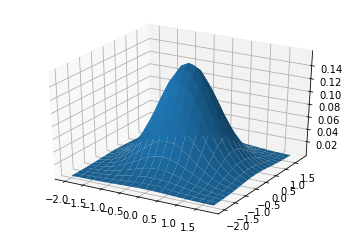

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-2, 2, 0.2)
Y = np.arange(-2, 2, 0.2)
X, Y = np.meshgrid(X, Y)
Z = 1/np.sqrt((2*np.pi)**2)*np.e**(-1/2*(X**2+Y**2))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z)
plt.show()

Once again there is a very simple way to generate samples from a multivariate gaussian in python using ```random.multivariate_normal``` from the ```numpy``` package.

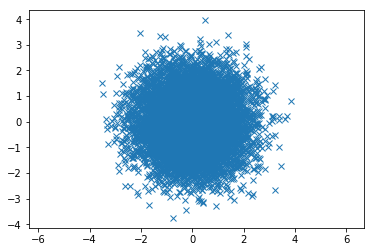

In [50]:
n = 10000

mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, n).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

We can make a 2d histogram that shows the generated distribution

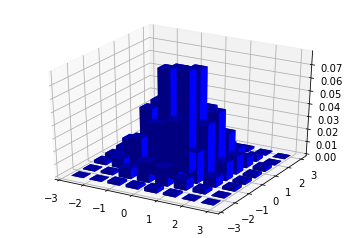

In [51]:
fig = plt.figure()
ax = fig.gca(projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=8, range=[[-3, 3], [-3, 3]])
hist = hist/n

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b')
plt.show()

This visualization is kind of bad, so maybe we can try using a contour plot [TO DO]

What happens when we use a non-identity covariance matrix? Lets try $\Sigma = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$

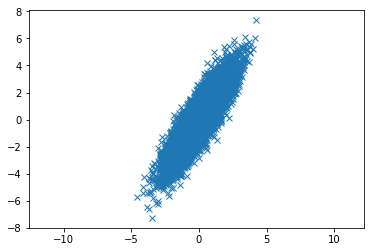

In [60]:
mean = [0, 0]
cov = [[2, 3], [1, 2]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, n).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

The new covariance matrix generates samples that do not seem to be independent (i.e. if $x$ is large, $y$ is more likely to be large). In general